# Machine Learning Foundation Nanodegree

## 1. Introduction.   
For this project we were asked to select a dataset and using the data answer a question of our choosing. I selected the No-show appointments[../no_show.csv] dataset.    
## 2. Question Posed    
**Q1.** What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?    
**Q2.** Do women visit doctors more frequently?


## 3. Data Wrangling.   
To Begin working with the dataset, we'll first need to import the functionality we need, load our data into a pandas DataFrame and cleanup missing data.    
### 3.1 Investigating Dataset and finding missing / improper data    

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns

# Import supplementary visualizations code visuals.py
import plotter as ptr

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
in_file = 'no_shows.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the dataset
display(full_data.head())

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Next, we will check if the dataset contains any missing values or NaN's

In [2]:
full_data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

From the above output, it is clear that there are no missing values or Nan's in the dataset.    
Also, while going through the dataset, I came across a few impossible ages (-1) which can be considered as outliers and removed from our dataset. 

In [3]:
print('Age:',sorted(full_data.Age.unique()))

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [4]:
full_data = full_data[full_data.Age >= 0]

## 4 Analysis of Data.    
Now we will examine the different features in the dataset, and try to determine the key features that can be used to predict if a patient will show up for their scheduled appointment.    
### 4.1 Analysing **Age** feature.    
We see a strong dependence of no-shows on the Patient's age. The No-Show percentage is at its peak for people in age-group 13-25. It then gradually decreases and hovers around the 15% mark. 

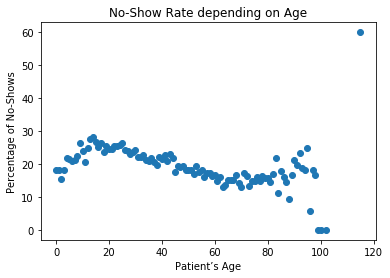

In [5]:
ptr.plot_appointment_no_show_stats(full_data, 'Age')

Following plots show No-Show percentage based on Gender. These plots also seems to be following the same pattern. 

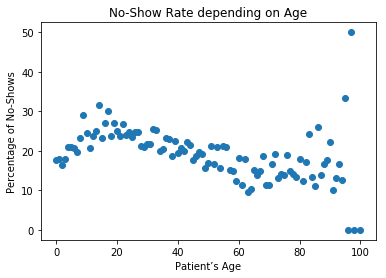

In [6]:
ptr.plot_appointment_no_show_stats(full_data, 'Age', ["Gender == 'M'"])

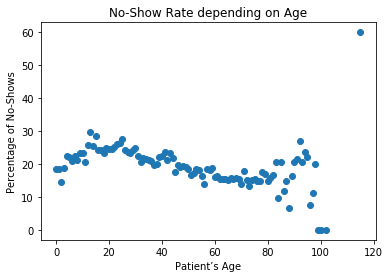

In [7]:
ptr.plot_appointment_no_show_stats(full_data, 'Age', ["Gender == 'F'"])

### 4.2 Analysing **Day of week** feature.    
Adding a new feature 'Day of week' calculated from 'AppointmentDay' to the dataset to determine of day of week has any impact on the No-Show percentages.    
The plot suggests the the No-Show rates are quite similar on weekdays. We see a small spike on saturaday, but this may be due a small sample size when compared to other days. No Data is available for Sunday.

       Param Level  AbsentCount  PresentCount  Total  AbsentPercent
0  DayOfWeek   Fri         4037         14982  19019      21.226142
1  DayOfWeek   Tue         5152         20488  25640      20.093604
2  DayOfWeek   Mon         4690         18024  22714      20.648058
3  DayOfWeek   Wed         5093         20774  25867      19.689179
4  DayOfWeek   Thu         3338         13909  17247      19.354091
5  DayOfWeek   Sat            9            30     39      23.076923


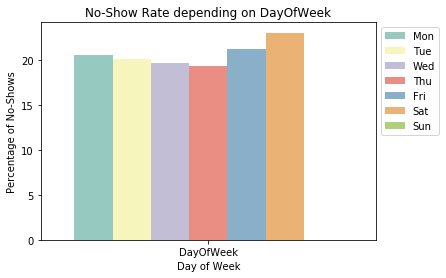

In [8]:
ptr.plot_appointment_no_show_stats(full_data, 'DayOfWeek')

Following plots show No-Show percentage based on Gender. These plots also seems to be following the same pattern. Data for Saturday may be unusual due to small sample size.

       Param Level  AbsentCount  PresentCount  Total  AbsentPercent
0  DayOfWeek   Fri         1425          5316   6741      21.139297
1  DayOfWeek   Mon         1589          6449   8038      19.768599
2  DayOfWeek   Tue         1730          7036   8766      19.735341
3  DayOfWeek   Wed         1794          7209   9003      19.926691
4  DayOfWeek   Thu         1185          4944   6129      19.334312
5  DayOfWeek   Sat            2             8     10      20.000000


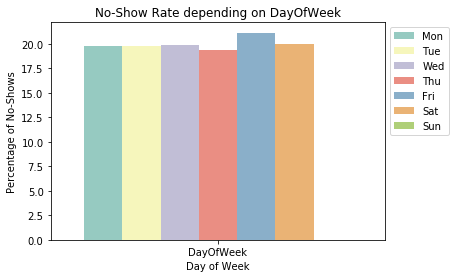

In [9]:
ptr.plot_appointment_no_show_stats(full_data, 'DayOfWeek', ["Gender == 'M'"])

       Param Level  AbsentCount  PresentCount  Total  AbsentPercent
0  DayOfWeek   Fri         2612          9666  12278      21.273823
1  DayOfWeek   Tue         3422         13452  16874      20.279720
2  DayOfWeek   Mon         3101         11575  14676      21.129736
3  DayOfWeek   Wed         3299         13565  16864      19.562381
4  DayOfWeek   Thu         2153          8965  11118      19.364994
5  DayOfWeek   Sat            7            22     29      24.137931


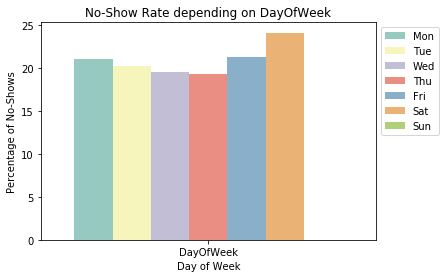

In [10]:
ptr.plot_appointment_no_show_stats(full_data, 'DayOfWeek', ["Gender == 'F'"])

### 4.3 Analysing **Handicap** feature.    
The level of Handicap does not seem to have any effect on No-Show percentages. Level 3 and 4 show higher No-Show rates but the sample size is extremely small to make any deductions.

     Param  Level  AbsentCount  PresentCount   Total  AbsentPercent
0  Handcap      0        21912         86373  108285      20.235490
1  Handcap      1          366          1676    2042      17.923604
2  Handcap      2           37           146     183      20.218579
3  Handcap      3            3            10      13      23.076923
4  Handcap      4            1             2       3      33.333333


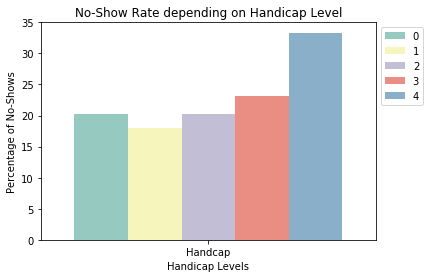

In [11]:
ptr.plot_appointment_no_show_stats(full_data, 'Handcap')

### 4.4 Analysing **SMS Received** feature.    
Receiving SMS seems to have an adverse effect on No-Show percentages. People receiving SMS have Higher No-Show percentages.

          Param  Level  AbsentCount  PresentCount  Total  AbsentPercent
0  SMS_received      0        12535         62509  75044      16.703534
1  SMS_received      1         9784         25698  35482      27.574545


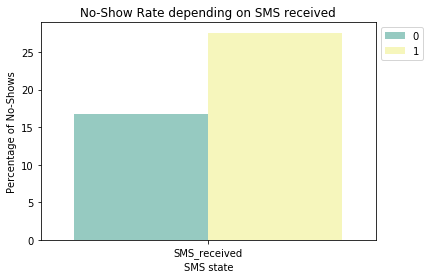

In [12]:
ptr.plot_appointment_no_show_stats(full_data, 'sms')

### 4.5 Analysing **Diseases/Scholarship** feature.    
Alcoholism seems to have no impact in determining No-Show percentages. People suffering from Diabetes and Hypertension seem to have lower No-Show percentages whereas alcoholism seems to have no impact on No-Show rates. People who received scholarship have higher No-Show percentages suggesting that people get a little careless on receiving scholarship.

          Param  Level  AbsentCount  PresentCount   Total  AbsentPercent
0      Diabetes      0        20889         81694  102583      20.363023
1      Diabetes      1         1430          6513    7943      18.003273
2    Alcoholism      0        21642         85524  107166      20.194838
3    Alcoholism      1          677          2683    3360      20.148810
4  Hipertension      1         3772         18029   21801      17.301959
5  Hipertension      0        18547         70178   88725      20.903917
6   Scholarship      0        19741         79924   99665      19.807355
7   Scholarship      1         2578          8283   10861      23.736304


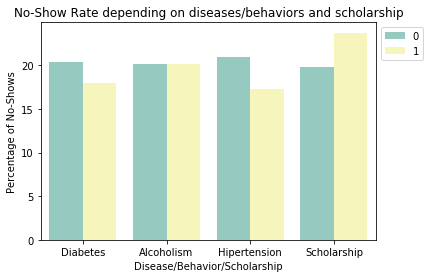

In [13]:
ptr.plot_appointment_no_show_stats(full_data, 'other')

### 4.6 Analysing visits to doctor By Gender    
The below plot answers the second question. Female patients visit doctors more often. That stats suggest for an age group of 14-80, women visit a doctor 2 times the number of visits by men.

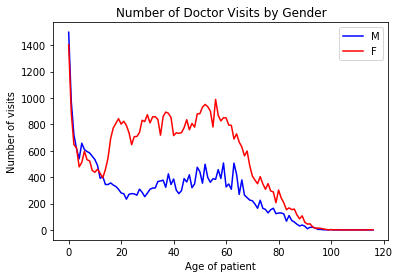

In [14]:
ptr.plot_appointment_turnup_by_gender(full_data)

## 5. Conclusion.   
Amongst all the features that were analysed, age of patient seems to be the most promising feature in determining whether a person will turn up for an appointment.    
In order to make more accurate predictions we will need a lot more features like    
- Time of appointment (eg: Morning, evening etc)
- If patient is suffering from other diseases    
- Waiting time after appointment was taken.   

Adding few more features to this dataset should help in making better predictions.